In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandasql import PandaSQL

pdsql = PandaSQL()
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('/Users/stefany/Desktop/analisisdatos/da2019-Stefany2889/datos/result.txt')#, header = None)
#print(data)
print(data.keys())



Index(['decals_id', 'ra', 'dec', 'elon', 'elat', 'glon', 'glat', 'mjd_min',
       'mjd_max', 'htm9',
       ...
       'nobs_r', 'nobs_z', 'anymask_g', 'anymask_r', 'anymask_z', 'allmask_g',
       'allmask_r', 'allmask_z', 'brickname', 'type'],
      dtype='object', length=115)


/Users/stefany/miniconda3/envs/analisis-env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (69,70,83,84,97) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#data

In [4]:
data['type'][10]

'PSF'

In [5]:
a= data['type'].unique()
a

array(['PSF', 'REX', 'COMP', 'DEV', 'EXP'], dtype=object)

In [6]:
print(len(data['dec'][data['type'] == 'PSF'])), print(len(data['dec'][data['type'] == 'EXP'])), print(len(data['dec'][data['type'] == 'COMP']))

6766
459
206


(None, None, None)

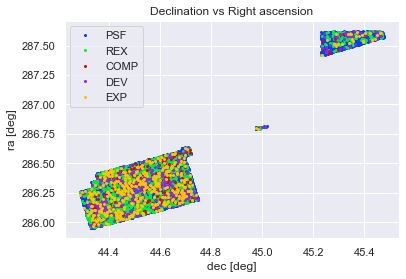

In [7]:
plt.style.use('seaborn-bright')
for i in a:
    plt.plot(data['dec'][data['type'] == i], data['ra'][data['type'] == i], '.', markersize = 4,label = i)
plt.legend()
plt.xlabel('dec [deg]')
plt.ylabel('ra [deg]')
plt.title('Declination vs Right ascension');

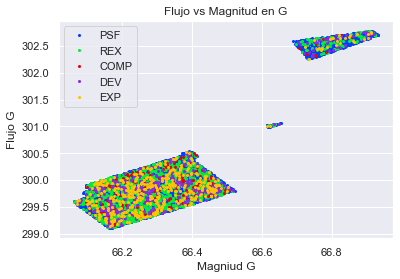

In [8]:
for i in a:
    plt.plot(data['elat'][data['type'] == i], data['elon'][data['type'] == i], '.', markersize = 4,label = i)
plt.legend()
plt.xlabel('Magniud G')
plt.ylabel('Flujo G')
plt.title('Flujo vs Magnitud en G');



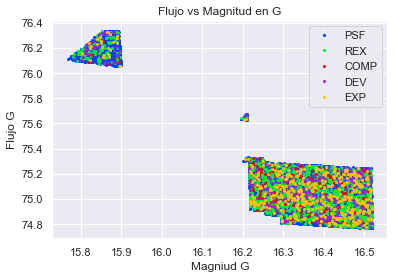

In [9]:
for i in a:
    plt.plot(data['glat'][data['type'] == i], data['glon'][data['type'] == i], '.', markersize = 4,label = i)
plt.legend()
plt.xlabel('Magniud G')
plt.ylabel('Flujo G')
plt.title('Flujo vs Magnitud en G');

In [10]:
data['type'].unique()
#pdsql("SELECT type FROM data WHERE type!= 'COMP' ")

array(['PSF', 'REX', 'COMP', 'DEV', 'EXP'], dtype=object)

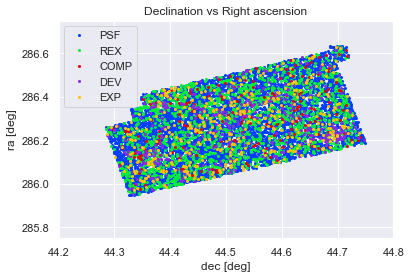

In [11]:
for i in a:
    plt.plot(data['dec'][data['type'] == i], data['ra'][data['type'] == i], '.', markersize = 4,label = i)
plt.legend()
plt.xlim(44.2,44.8)
plt.ylim(285.75,286.75)
plt.xlabel('dec [deg]')
plt.ylabel('ra [deg]')
plt.title('Declination vs Right ascension');

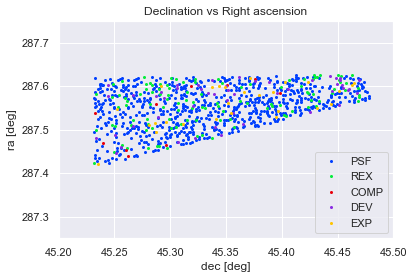

In [12]:
for i in a:
    plt.plot(data['dec'][data['type'] == i], data['ra'][data['type'] == i], '.', markersize = 4,label = i)
plt.legend()
plt.xlim(45.2,45.5)
plt.ylim(287.25,287.75)
plt.xlabel('dec [deg]')
plt.ylabel('ra [deg]')
plt.title('Declination vs Right ascension');

Para otras variables

Para el caso de Flujo vs Magnitud en sus canales R, G, Z

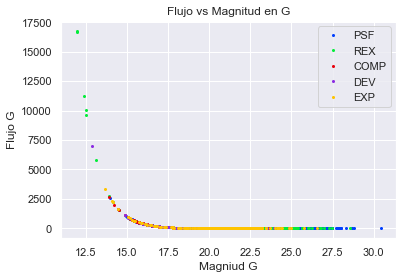

In [13]:
for i in a:
    plt.plot(data['mag_g'][data['type'] == i], data['flux_g'][data['type'] == i], '.', markersize = 4,label = i)
plt.legend()
plt.xlabel('Magniud G')
plt.ylabel('Flujo G')
plt.title('Flujo vs Magnitud en G');


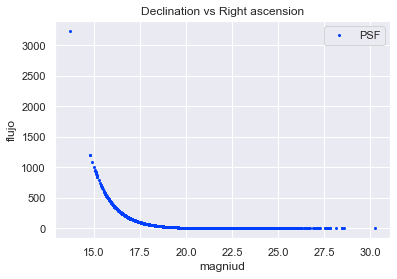

In [14]:

plt.plot(data['dered_mag_g'][data['type'] == 'PSF'], data['dered_flux_g'][data['type'] == 'PSF'], '.', markersize = 4,label = 'PSF')
plt.legend()
plt.xlabel('magniud')
plt.ylabel('flujo')
plt.title('Declination vs Right ascension');


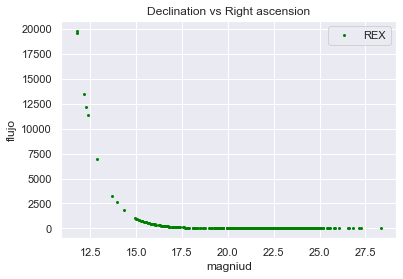

In [15]:
plt.plot(data['dered_mag_g'][data['type'] == 'REX'], data['dered_flux_g'][data['type'] == 'REX'], '.', markersize = 4,color='green', label = 'REX')

plt.legend()
plt.xlabel('magniud')
plt.ylabel('flujo')
plt.title('Declination vs Right ascension');

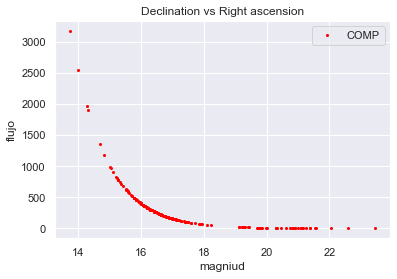

In [16]:
plt.plot(data['dered_mag_g'][data['type'] == 'COMP'], data['dered_flux_g'][data['type'] == 'COMP'], '.', markersize = 4,color='red', label = 'COMP')

plt.legend()
plt.xlabel('magniud')
plt.ylabel('flujo')
plt.title('Declination vs Right ascension');

In [17]:
newdata= data.replace('Infinity', np.nan)

eliptic longitud and eliptic latitud

In [18]:
print(len(newdata['g_r'])), print(len(data['r_z']))



10000
10000


(None, None)

In [19]:
newdata = data


In [30]:
newdata = newdata.dropna(subset=['r_z', 'g_r'])

In [21]:
newdata['r_z'] = newdata['r_z'].astype(float)

/Users/stefany/miniconda3/envs/analisis-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### select to combine optical and infrared colors, and look at both the population of objects overall

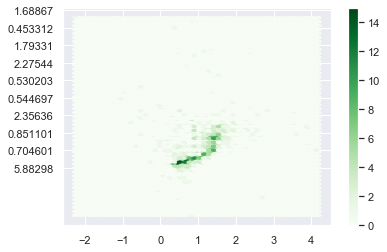

In [31]:
plt.hexbin(newdata['g_r'], newdata['r_z'], gridsize=(50,50), cmap=plt.cm.Greens) #cmap=plt.cm.Reds
plt.colorbar()
plt.show()


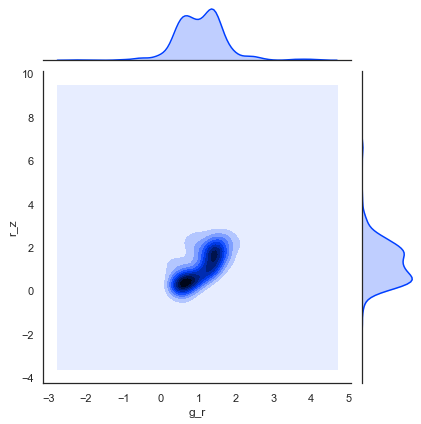

In [32]:
with sns.axes_style('white'):
    sns.jointplot(newdata['g_r'], newdata['r_z'],newdata, kind='kde')

In [24]:
print(len(newdata['g_r'])), print(len(newdata['r_z']))

8879
8879


(None, None)

In [25]:
newdata= newdata['r_z'].replace('inf', np.nan)

##### z_w1=Computed (z-w1 color)

#data['z_w1'].unique()

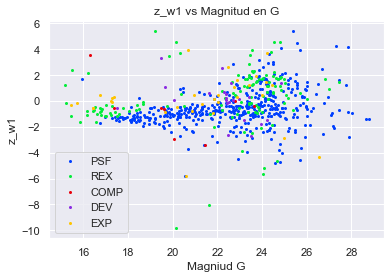

In [26]:
newdata = data
newdata= data.replace('Infinity', np.nan)
newdata = newdata.dropna(subset=['mag_g', 'z_w1']) # Drop nan type
newdata['z_w1'] =newdata['z_w1'].astype(float) 
for i in a:
    plt.plot(newdata['mag_g'][newdata['type'] == i], newdata['z_w1'][newdata['type'] == i], '.', markersize = 4,label = i)
plt.legend()
plt.xlabel('Magniud G')
plt.ylabel('z_w1')
plt.title('z_w1 vs Magnitud en G');



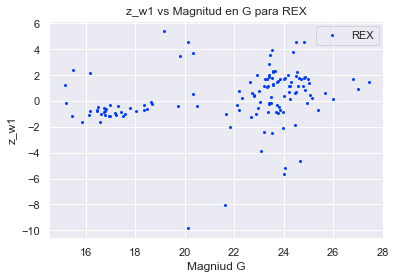

In [27]:
plt.plot(newdata['mag_g'][newdata['type'] == 'REX'], newdata['z_w1'][newdata['type'] == 'REX'], '.', markersize = 4,label = 'REX')
plt.legend()
plt.xlabel('Magniud G')
plt.ylabel('z_w1')
plt.title('z_w1 vs Magnitud en G para REX' );


